In [1]:
import sys
sys.path.append('/mnt/cocoapi/PythonAPI/')

from pycocotools.coco import COCO
import os, sys, zipfile
import urllib.request
import shutil
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pylab
import json
from pathlib import Path
import csv
import cv2
from random import randrange

In [2]:
output_dir = '/mnt/data'
image_set = 'test'
anno_file = Path(output_dir, 'annotations', image_set+'.json')
coco=COCO(anno_file.as_posix())

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


In [3]:
result_path = '/mnt/data/outputs/detections_test_results-v1.json'
Path(result_path).exists()
detections = json.load(Path(result_path).open())

d1 = detections[0]
d1
len(detections)

26262

{'bbox': [158.73141196771422, 145.2790497405599, 189.26030620631093, 331.657233001912], 'category_id': 2, 'image_id': 18154982444879483238, 'score': 0.9991292357444763}


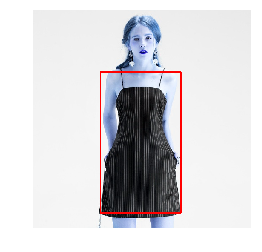

{'supercategory': 'dress', 'id': 2, 'name': 'dress', 'keypoints': ['center_front', 'neckline_left', 'shoulder_left', 'cuff_left_out', 'cuff_left_in', 'armpit_left', 'waistline_left', 'hemline_left', 'hemline_right', 'waistline_right', 'armpit_right', 'cuff_right_in', 'cuff_right_out', 'shoulder_right', 'neckline_right'], 'skeleton': [[1, 2], [1, 15], [2, 15], [2, 3], [2, 6], [3, 6], [3, 4], [4, 5], [5, 6], [6, 7], [6, 8], [6, 11], [7, 8], [7, 10], [8, 9], [9, 10], [9, 11], [10, 11], [11, 14], [11, 15], [11, 12], [12, 13], [13, 14], [14, 15]]}


In [25]:
det = detections[9000]
print(det)
img_anno = coco.loadImgs(det['image_id'])[0]
img_path = Path(output_dir, 'images', image_set, img_anno['file_name'])   
xmin, ymin, width, height = [ int(x) for x in det['bbox']]
img = cv2.imread(img_path.as_posix())
cv2.rectangle(img, (xmin, ymin), (xmin+width, ymin+height), (255, 0, 0), 2)
plt.axis('off')
plt.imshow(img)
plt.show()
print(coco.cats[det['category_id']])